In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [ ]:
data = pd.read_excel(r'/content/A.xlsx')

In [ ]:
data.shape

(603, 40)

In [ ]:
data.head()

,ID,Name,Age,Potential,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Overall
0,158023,Cristiano Ronaldo,32,94,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,94
1,20801,L. Messi,30,93,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,93
2,9014,Neymar,25,94,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,92
3,41236,L. SuÃ¡rez,30,92,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,92
4,167495,M. Neuer,31,92,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,92


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  603 non-null    int64 
 1   Name                603 non-null    object
 2   Age                 603 non-null    int64 
 3   Potential           603 non-null    int64 
 4   Special             603 non-null    int64 
 5   Acceleration        603 non-null    int64 
 6   Aggression          603 non-null    int64 
 7   Agility             603 non-null    int64 
 8   Balance             603 non-null    int64 
 9   Ball control        603 non-null    int64 
 10  Composure           603 non-null    int64 
 11  Crossing            603 non-null    int64 
 12  Curve               603 non-null    int64 
 13  Dribbling           603 non-null    int64 
 14  Finishing           603 non-null    int64 
 15  Free kick accuracy  603 non-null    int64 
 16  GK diving           603 no

In [ ]:
data = data.drop(['Name', 'Age', 'Special', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes'], axis =1)

In [ ]:
data.columns

Index(['ID', 'Potential', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Overall'],
      dtype='object')

# Feature Engineering

In [ ]:
# Movement = Acceleration,Sprint Speed,Agility,Reactions,Balance 
# ATTACKING = Crossing,Finishing,Heading Accuracy,Short Passing,Volleys
# SKILL = Dribbling,Curve,FK Accuracy,Long Passing,Ball Control
# POWER = Shot Power,Jumping,Stamina,Strength,Long Shots
# MENTALITY = Aggression,Interceptions,Positioning,Vision,Penalties,Composure
# DEFENDING = Defensive Awareness,Standing Tackle,Sliding Tackle


In [ ]:
cols = ['Acceleration', 'Aggression', 'Agility', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
Movement = data[['Acceleration', 'Agility', 'Reactions', 'Balance']]
Attacking = data[['Crossing', 'Finishing', 'Heading accuracy', 'Short passing', 'Volleys']]
Skill = data[['Dribbling', 'Curve', 'Free kick accuracy', 'Long passing', 'Ball control']]
Power = data[['Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots']]
Mentality = data[['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']]
Defending = data[['Standing tackle', 'Sliding tackle']]

In [ ]:
data.isna().sum()

ID                    0
Potential             0
Acceleration          0
Aggression            0
Agility               0
Balance               0
Ball control          0
Composure             0
Crossing              0
Curve                 0
Dribbling             0
Finishing             0
Free kick accuracy    0
Heading accuracy      0
Interceptions         0
Jumping               0
Long passing          0
Long shots            0
Marking               0
Penalties             0
Positioning           0
Reactions             0
Short passing         0
Shot power            0
Sliding tackle        0
Sprint speed          0
Stamina               0
Standing tackle       0
Strength              0
Vision                0
Volleys               0
Overall               0
dtype: int64

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

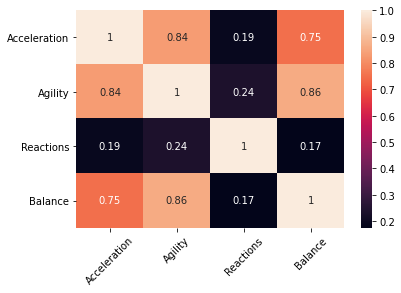

In [ ]:
sns.heatmap(Movement.corr(),annot=True)
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

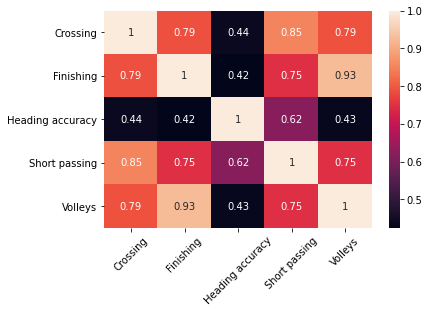

In [ ]:
sns.heatmap(Attacking.corr(),annot=True)
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

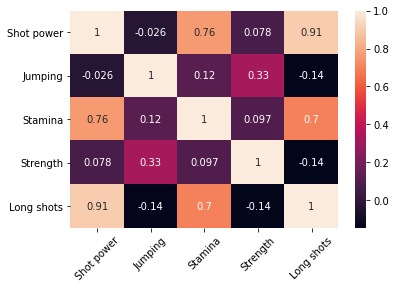

In [ ]:
sns.heatmap(Power.corr(),annot=True)
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

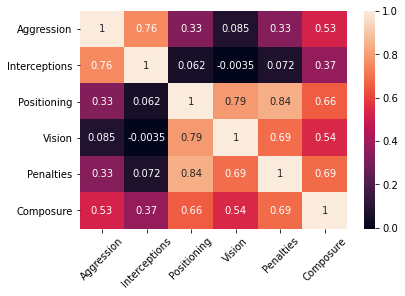

In [ ]:
sns.heatmap(Mentality.corr(),annot=True)
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

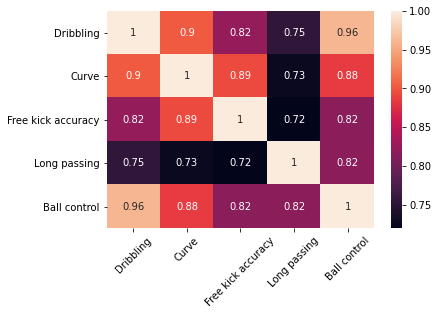

In [ ]:
sns.heatmap(Skill.corr(),annot=True)
plt.xticks(rotation=45)

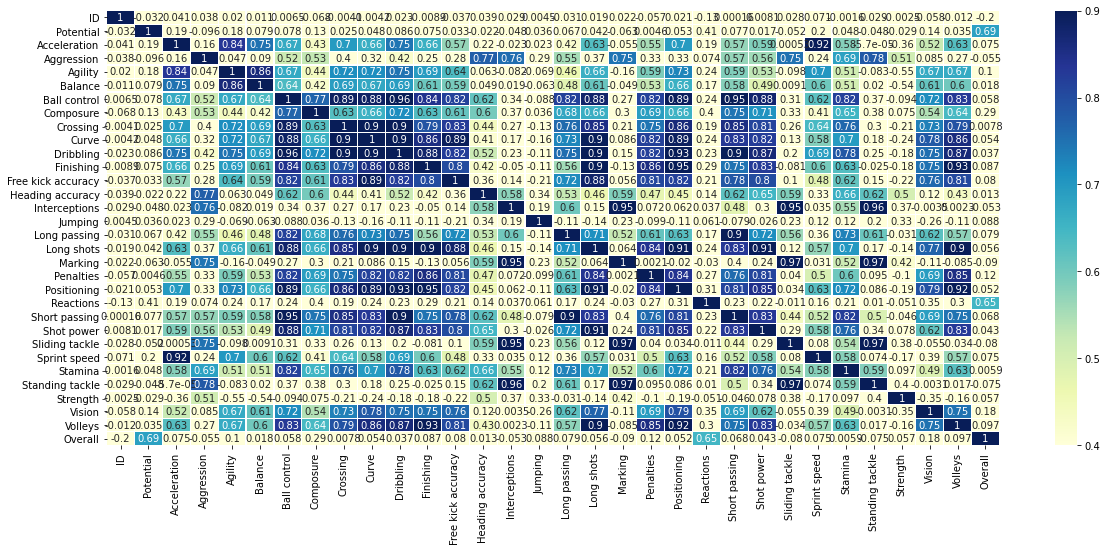

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
#From above heatmaps, Agilty&balance, Acceleration&agility,finishing&volleys
#shotpower&longshots,position&penalties,dribbling&ball ctrl all are highly correlated.
#Hence, dropping the columns.

In [ ]:
data = data.drop(['Agility', 'Balance', 'Finishing', 'Volleys', 'Shot power', 'Long shots', 'Positioning', 'Penalties', 'Dribbling', 'Interceptions', 'Ball control'], axis =1)

In [ ]:
data.head()

,ID,Potential,Acceleration,Aggression,Composure,Crossing,Curve,Free kick accuracy,Heading accuracy,Jumping,Long passing,Marking,Reactions,Short passing,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Overall
0,158023,94,89,63,95,85,81,76,88,95,77,22,96,83,23,91,92,31,80,85,94
1,20801,93,92,48,96,77,89,90,71,68,87,13,95,88,26,87,73,28,59,90,93
2,9014,94,94,56,92,75,81,84,62,61,75,21,88,81,33,90,78,24,53,80,92
3,41236,92,88,78,83,77,86,84,77,69,64,30,93,83,38,77,89,45,80,84,92
4,167495,92,58,29,70,15,14,11,25,78,59,10,85,55,11,61,44,10,83,70,92


In [ ]:
data['Movement'] = data[['Acceleration', 'Reactions']].mean(axis=1)
data['Attacking'] = data[['Crossing', 'Heading accuracy', 'Short passing']].mean(axis=1)
data['Skill'] = data[['Curve', 'Free kick accuracy', 'Long passing']].mean(axis=1)
data['Power'] = data[['Jumping', 'Stamina', 'Strength']].mean(axis=1)
data['Mentality'] = data[['Aggression', 'Vision', 'Composure']].mean(axis=1)
data['Defending'] = data[['Standing tackle', 'Sliding tackle']].mean(axis=1)

In [ ]:
data.columns

Index(['ID', 'Potential', 'Acceleration', 'Aggression', 'Composure',
       'Crossing', 'Curve', 'Free kick accuracy', 'Heading accuracy',
       'Jumping', 'Long passing', 'Marking', 'Reactions', 'Short passing',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Overall', 'Movement', 'Attacking', 'Skill',
       'Power', 'Mentality', 'Defending'],
      dtype='object')

# Label Encoding

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#l=LabelEncoder()
#data['Segmentation']=l.fit_transform(data['N'])

# Splitting data

In [ ]:
x = data.drop(['ID','Overall'], axis=1)
y = data['Overall']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x_train=scaler.fit_transform(x_train)
#y_test=scaler.fit_transform(y_test)

# Using Random Forest Model to predict data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score 
forest = RandomForestClassifier()
model = forest.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
sample = [[86,44,35,58,15,13,12,17,74,24,14,80,37,16,52,36,13,74,50,62,23,16.333333,61.333333,47.666667,14.500000]]
pr=model.predict(sample)
print(pr)

[83]


In [ ]:
x_train.shape

(482, 25)

In [ ]:
x_test.shape

(121, 25)

In [ ]:
print(y_pred)

[83 79 79 83 82 82 88 79 85 82 86 83 82 79 81 81 86 82 81 83 88 82 79 80
 80 82 82 84 79 80 80 84 86 80 83 79 82 79 81 83 81 83 81 80 88 83 79 81
 86 82 81 82 82 81 80 81 82 82 82 82 82 82 81 79 82 84 79 80 87 82 82 82
 80 80 80 81 81 89 80 80 81 81 79 79 86 86 83 83 81 80 82 79 83 82 82 81
 82 89 80 81 83 82 79 81 83 79 83 82 81 80 82 81 79 80 79 83 82 84 80 80
 82]


In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precition score' , precision_score(y_test,y_pred, average='weighted'))

accuracy is 0.4049586776859504
Weighted F1-score: 0.39
precition score 0.47316003952830626


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_pred)

array([[14,  7,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  8,  3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  8,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  5, 10,  2,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  7,  4,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  4,  1,  1,  2,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          79       0.78      0.58      0.67        24
          80       0.42      0.47      0.44        17
          81       0.38      0.47      0.42        17
          82       0.32      0.50      0.39        20
          83       0.27      0.27      0.27        15
          84       0.00      0.00      0.00         5
          85       1.00      0.08      0.15        12
          86       0.33      0.67      0.44         3
          87       0.00      0.00      0.00         1
          88       0.33      0.33      0.33         3
          89       0.50      1.00      0.67         1
          90       0.00      0.00      0.00         2
          92       0.00      0.00      0.00         1

    accuracy                           0.40       121
   macro avg       0.33      0.34      0.29       121
weighted avg       0.47      0.40      0.39       121



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('The MSE is: ', mean_squared_error(y_test,y_pred))

The MSE is:  2.7768595041322315


# Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred=logit_model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(y_pred)

[82 81 86 82 81 80 79 82 81 80 82 87 82 80 80 81 81 80 80 80 86 79 81 82
 79 80 82 80 80 83 80 81 80 80 82 79 82 82 80 80 82 82 80 82 81 80 80 80
 80 82 80 80 82 79 82 80 82 82 82 82 82 88 80 80 82 82 80 80 80 79 80 82
 82 81 80 80 80 80 81 79 80 80 83 79 80 80 80 80 80 80 80 80 81 82 80 80
 82 80 80 80 80 81 82 80 80 80 80 82 80 81 79 80 80 81 80 80 80 80 80 79
 80]


In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precition score' , precision_score(y_test,y_pred, average='weighted'))

accuracy is 0.12396694214876033
Weighted F1-score: 0.08
precition score 0.08719829063645426


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data_model = DecisionTreeClassifier()

In [ ]:
logit_model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logit_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
print(accuracy_score(y_test,y_pred))

0.12396694214876033


In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precition score' , precision_score(y_test,y_pred, average='weighted'))

accuracy is 0.12396694214876033
Weighted F1-score: 0.08
precition score 0.08719829063645426


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.34710743801652894


In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precition score' , precision_score(y_test,y_pred, average='weighted'))

accuracy is 0.34710743801652894
Weighted F1-score: 0.33
precition score 0.34782107166804577


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test, y_pred)

array([[11, 12,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  9,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  6,  4,  5,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  3, 11,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  6,  4,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  4,  3,  0,  2,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0]])

# SVM

In [ ]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred=svm_linear.predict(x_test)

In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precition score' , precision_score(y_test,y_pred, average='weighted'))

accuracy is 0.23140495867768596
Weighted F1-score: 0.22
precition score 0.28986192870490396


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precition score' , precision_score(y_test,y_pred, average='weighted'))

accuracy is 0.23140495867768596
Weighted F1-score: 0.22
precition score 0.28986192870490396


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGB

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model1=xgb.fit(x_train,y_train)

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
print('accuracy is',accuracy_score(y_test,y_pred))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precition score' , precision_score(y_test,y_pred, average='weighted'))

accuracy is 0.4628099173553719
Weighted F1-score: 0.46
precition score 0.49063596830976514


In [ ]:
y_pred

array([83, 80, 79, 82, 82, 82, 86, 80, 89, 82, 85, 84, 84, 79, 79, 81, 86,
       82, 83, 85, 90, 82, 79, 80, 81, 83, 84, 88, 81, 80, 79, 86, 86, 80,
       83, 79, 82, 79, 81, 83, 81, 88, 80, 80, 83, 83, 80, 85, 86, 82, 80,
       83, 84, 80, 80, 81, 82, 83, 81, 82, 85, 83, 81, 79, 82, 84, 79, 80,
       87, 82, 87, 92, 80, 80, 80, 80, 79, 82, 80, 80, 82, 81, 80, 81, 86,
       86, 83, 86, 79, 83, 82, 79, 86, 83, 82, 82, 82, 85, 79, 81, 83, 82,
       79, 82, 84, 79, 84, 82, 82, 80, 81, 81, 79, 82, 79, 83, 83, 86, 80,
       80, 82])

In [ ]:
x_test.iloc[0,:]

Potential             86.000000
Acceleration          44.000000
Aggression            35.000000
Composure             58.000000
Crossing              15.000000
Curve                 13.000000
Free kick accuracy    12.000000
Heading accuracy      17.000000
Jumping               74.000000
Long passing          24.000000
Marking               14.000000
Reactions             80.000000
Short passing         37.000000
Sliding tackle        16.000000
Sprint speed          52.000000
Stamina               36.000000
Standing tackle       13.000000
Strength              74.000000
Vision                50.000000
Movement              62.000000
Attacking             23.000000
Skill                 16.333333
Power                 61.333333
Mentality             47.666667
Defending             14.500000
Name: 110, dtype: float64